In [1]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rc('font', family='Malgun Gothic') # For Windows
plt.rcParams['figure.figsize'] = [15, 10]

print(plt.rcParams['font.family'])

['Malgun Gothic']


In [2]:
df = pd.read_csv('./NHIS_OPEN_GJ_2018_100.csv')

In [3]:
df.shape

(1000000, 34)

In [4]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999586.000000,999747.000000,999734.000000,999783.000000,999783.000000,994270.000000,994270.000000,994085.000000,332756.000000,332748.000000,332746.000000,325878.000000,994086.000000,989430.000000,994094.000000,994094.000000,994094.000000,994091.000000,999766.000000,645057.000000,1000000.000000,399992.000000,0.0,0.0,0.0,399993.000000,1000000.0
mean,2018.0,500000.500000,1.464400,10.596769,33.696380,162.292530,63.589255,81.463490,0.976794,0.974457,1.033691,1.032349,122.669335,76.074278,100.868015,195.911052,136.162159,56.421913,113.439281,14.290730,1.097214,0.864442,26.301625,26.287882,37.607043,1.606761,0.999983,0.399993,0.215164,NaN,NaN,NaN,0.604551,20191219.0
std,0.0,288675.278933,0.498731,2.879269,12.677639,9.335381,12.730227,10.228128,0.605965,0.602352,0.180433,0.176925,14.624761,10.012275,24.111387,40.563860,102.840647,18.576129,38.683032,1.579671,0.439956,0.498879,26.367652,27.275675,50.606656,0.816770,0.004129,0.489897,0.410937,NaN,NaN,NaN,0.592357,0.0
min,2018.0,1.000000,1.000000,5.000000,11.000000,125.000000,30.000000,1.000000,0.100000,0.100000,1.000000,1.000000,63.000000,27.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,20191219.0
25%,2018.0,250000.750000,1.000000,8.000000,27.000000,155.000000,55.000000,75.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,89.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,20191219.0
50%,2018.0,500000.500000,1.000000,11.000000,41.000000,160.000000,60.000000,81.300000,1.000000,1.000000,1.000000,1.000000,121.000000,76.000000,96.000000,194.000000,111.000000,54.000000,112.000000,14.300000,1.000000,0.800000,23.000000,20.000000,24.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,20191219.0
75%,2018.0,750000.250000,2.000000,13.000000,43.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,221.000000,163.000000,65.000000,136.000000,15.400000,1.000000,1.000000,29.000000,30.000000,40.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000,20191219.0
max,2018.0,1000000.000000,2.000000,18.000000,50.000000,190.000000,135.000000,999.000000,9.900000,9.900000,2.000000,2.000000,267.000000,173.000000,872.000000,2386.000000,4765.000000,1348.000000,2332.000000,24.000000,6.000000,97.000000,9999.000000,5896.000000,999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000,20191219.0


In [5]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                414
시력(좌)               253
시력(우)               266
청력(좌)               217
청력(우)               217
수축기혈압              5730
이완기혈압              5730
식전혈당(공복혈당)         5915
총콜레스테롤           667244
트리글리세라이드         667252
HDL콜레스테롤         667254
LDL콜레스테롤         674122
혈색소                5914
요단백               10570
혈청크레아티닌            5906
(혈청지오티)AST         5906
(혈청지오티)ALT         5906
감마지티피              5909
흡연상태                234
음주여부             354943
구강검진수검여부              0
치아우식증유무          600008
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               600007
데이터공개일자               0
dtype: int64

In [6]:
df = df.drop(['기준년도','가입자일련번호','시도코드','데이터공개일자'],axis=1)
df

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석
0,2,7,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,6,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0
2,1,12,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0
3,2,15,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0
4,2,14,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,11,165,75,84.0,1.2,1.2,1.0,1.0,110.0,70.0,107.0,NaN,NaN,NaN,NaN,12.2,1.0,0.7,18.0,15.0,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN
999996,1,7,170,75,88.0,2.0,2.0,1.0,1.0,136.0,88.0,114.0,NaN,NaN,NaN,NaN,17.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0
999997,1,8,175,80,87.0,1.2,1.2,1.0,1.0,162.0,90.0,98.0,NaN,NaN,NaN,NaN,16.4,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,1,11,165,70,80.2,0.9,1.2,1.0,1.0,140.0,98.0,94.0,NaN,NaN,NaN,NaN,15.7,1.0,1.2,20.0,18.0,14.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df.dropna(subset=['허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)']) #결측치있는행 모두제거
df["음주여부"] = df["음주여부"].fillna(value=0)
df

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,당뇨병,복부비만,BMI,BMI코드,고혈압
0,2,7,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,23.437500,0,0
1,1,6,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,0,0,19.031142,0,1
2,1,12,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,0,0,25.711662,1,1
3,2,15,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,1,0,20.000000,0,2
4,2,14,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,1,0,23.781213,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,11,165,75,84.0,1.2,1.2,1.0,1.0,110.0,70.0,107.0,NaN,NaN,NaN,NaN,12.2,1.0,0.7,18.0,15.0,19.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1,0,27.548209,1,0
999996,1,7,170,75,88.0,2.0,2.0,1.0,1.0,136.0,88.0,114.0,NaN,NaN,NaN,NaN,17.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,1,0,25.951557,1,1
999997,1,8,175,80,87.0,1.2,1.2,1.0,1.0,162.0,90.0,98.0,NaN,NaN,NaN,NaN,16.4,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,0,0,26.122449,1,3
999998,1,11,165,70,80.2,0.9,1.2,1.0,1.0,140.0,98.0,94.0,NaN,NaN,NaN,NaN,15.7,1.0,1.2,20.0,18.0,14.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,25.711662,1,2


In [8]:
df['허리둘레'].value_counts().sort_index()

1.0       1
7.4       1
8.6       1
24.0      1
26.5      1
         ..
135.0     4
136.0     1
139.0     1
140.0     1
999.0    13
Name: 허리둘레, Length: 742, dtype: int64

In [9]:
df = df.loc[df["허리둘레"] >= 40] #허리둘레 이상치 있는 행 제거
df = df.loc[df["허리둘레"] <= 140]
df['허리둘레'].value_counts().sort_index()

40.0     1
44.0     1
48.0     1
48.1     1
49.0     1
        ..
134.0    1
135.0    4
136.0    1
139.0    1
140.0    1
Name: 허리둘레, Length: 734, dtype: int64

In [10]:
df['수축기혈압'].value_counts().sort_index() #혈압 이상치없음

63.0     2
66.0     2
70.0     5
71.0     3
72.0     3
        ..
241.0    1
242.0    1
249.0    1
250.0    1
267.0    1
Name: 수축기혈압, Length: 169, dtype: int64

In [11]:
df['이완기혈압'].value_counts().sort_index() #혈압 이상치없음

27.0     1
28.0     1
29.0     3
30.0     1
31.0     1
        ..
160.0    3
161.0    1
169.0    1
170.0    1
173.0    1
Name: 이완기혈압, Length: 134, dtype: int64

In [12]:
df['식전혈당(공복혈당)'].value_counts().sort_index() #혈당 이상치 없음

23.0     2
27.0     1
28.0     1
29.0     1
31.0     1
        ..
710.0    1
744.0    1
752.0    1
831.0    1
872.0    1
Name: 식전혈당(공복혈당), Length: 494, dtype: int64

In [13]:
df.isnull().sum()

성별코드                 0
연령대코드(5세단위)          0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레                 0
시력(좌)              195
시력(우)              206
청력(좌)              164
청력(우)              164
수축기혈압                0
이완기혈압                0
식전혈당(공복혈당)           0
총콜레스테롤          660930
트리글리세라이드        660938
HDL콜레스테롤        660940
LDL콜레스테롤        667805
혈색소                 12
요단백               4684
혈청크레아티닌              1
(혈청지오티)AST           1
(혈청지오티)ALT           1
감마지티피                4
흡연상태               233
음주여부                 0
구강검진수검여부             0
치아우식증유무         594007
결손치유무           993643
치아마모증유무         993643
제3대구치(사랑니)이상    993643
치석              594006
dtype: int64

In [14]:
diabete = df["식전혈당(공복혈당)"].copy()

def is_diabete(x):
    if(x >= 126):
        return 2
    elif((x >= 100) & (x < 126)):
        return 1
    else:
        return 0

diabete = diabete.apply(is_diabete)
df["당뇨병"] = diabete #당뇨병 컬럼 추가

In [15]:
obesity = df[['성별코드','허리둘레']].copy() 
obesity["복부비만"] = 0
obesity.loc[(obesity['성별코드'] == 1) & (obesity['허리둘레'] >= 90),'복부비만'] = 1
obesity.loc[(obesity['성별코드'] == 2) & (obesity['허리둘레'] >= 85),'복부비만'] = 1
df["복부비만"] = obesity["복부비만"] #복부비만 컬럼 추가

In [16]:
weight = df[['신장(5Cm단위)', '체중(5Kg단위)']].copy()

weight['BMI'] = weight['체중(5Kg단위)'] / ( (weight['신장(5Cm단위)'] / 100) * (weight['신장(5Cm단위)']/100) )

df['BMI'] = weight['BMI'] #bmi컬럼 추가

In [17]:
bmi = df['BMI'].copy()
def bmi_code(x):
    if(x >= 30):
        return 2
    elif(25 <= x < 30):
        return 1
    else:
        return 0

bmi = bmi.apply(bmi_code)
df["BMI코드"] = bmi #bmi코드 컬럼 추가

In [18]:
blood_pressure = df[['이완기혈압', '수축기혈압']].copy()
blood_pressure["고혈압"] = 0
blood_pressure.loc[(blood_pressure['이완기혈압'] < 80),'고혈압'] = 0
blood_pressure.loc[(80 <= blood_pressure['이완기혈압']) ,'고혈압'] = 1
blood_pressure.loc[(90 <= blood_pressure['이완기혈압']) & (blood_pressure['이완기혈압'] < 100),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['이완기혈압'] >= 100),'고혈압'] = 3

blood_pressure.loc[blood_pressure['수축기혈압'] < 120,'고혈압'] = 0
blood_pressure.loc[(120 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 140),'고혈압'] = 1
blood_pressure.loc[(140 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 160),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['수축기혈압'] >= 160),'고혈압'] = 3
df["고혈압"] = blood_pressure["고혈압"]

In [19]:
df.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,당뇨병,복부비만,BMI,BMI코드,고혈압
count,993643.000000,993643.000000,993643.000000,993643.000000,993643.000000,993448.000000,993437.000000,993479.000000,993479.000000,993643.000000,993643.000000,993643.000000,332713.000000,332705.000000,332703.000000,325838.000000,993631.000000,988959.000000,993642.000000,993642.000000,993642.000000,993639.000000,993410.000000,993643.000000,993643.000000,399636.000000,0.0,0.0,0.0,399637.000000,993643.000000,993643.000000,993643.000000,993643.000000,993643.000000
mean,1.463026,10.569117,162.348681,63.633715,81.436899,0.977614,0.975366,1.032920,1.031598,122.673883,76.078374,100.874115,195.911723,136.153568,56.422515,113.440504,14.291529,1.097211,0.864558,26.304610,26.291814,37.615557,1.608362,0.647766,0.402194,0.215191,NaN,NaN,NaN,0.604604,0.467160,0.243789,24.010855,0.398203,0.702212
std,0.498631,2.861437,9.312854,12.732016,9.677391,0.597898,0.595020,0.178426,0.174928,14.622733,10.010572,24.111816,40.559183,102.748141,18.576414,38.683583,1.579320,0.439993,0.498948,26.372788,27.279853,50.610730,0.817361,0.477667,0.490341,0.410955,NaN,NaN,NaN,0.592373,0.638171,0.429367,3.556839,0.583238,0.700829
min,1.000000,5.000000,125.000000,30.000000,40.000000,0.100000,0.100000,1.000000,1.000000,63.000000,27.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,13.333333,0.000000,0.000000
25%,1.000000,8.000000,155.000000,55.000000,75.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,89.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,21.484375,0.000000,0.000000
50%,1.000000,11.000000,160.000000,60.000000,81.200000,1.000000,1.000000,1.000000,1.000000,121.000000,76.000000,96.000000,194.000000,111.000000,54.000000,112.000000,14.300000,1.000000,0.800000,23.000000,20.000000,24.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,23.875115,0.000000,1.000000
75%,2.000000,13.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,221.000000,163.000000,65.000000,136.000000,15.400000,1.000000,1.000000,29.000000,30.000000,40.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,26.122449,1.000000,1.000000
max,2.000000,18.000000,190.000000,135.000000,140.000000,9.900000,9.900000,2.000000,2.000000,267.000000,173.000000,872.000000,2386.000000,4765.000000,1348.000000,2332.000000,24.000000,6.000000,97.000000,9999.000000,5896.000000,999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000,2.000000,1.000000,44.081633,2.000000,3.000000


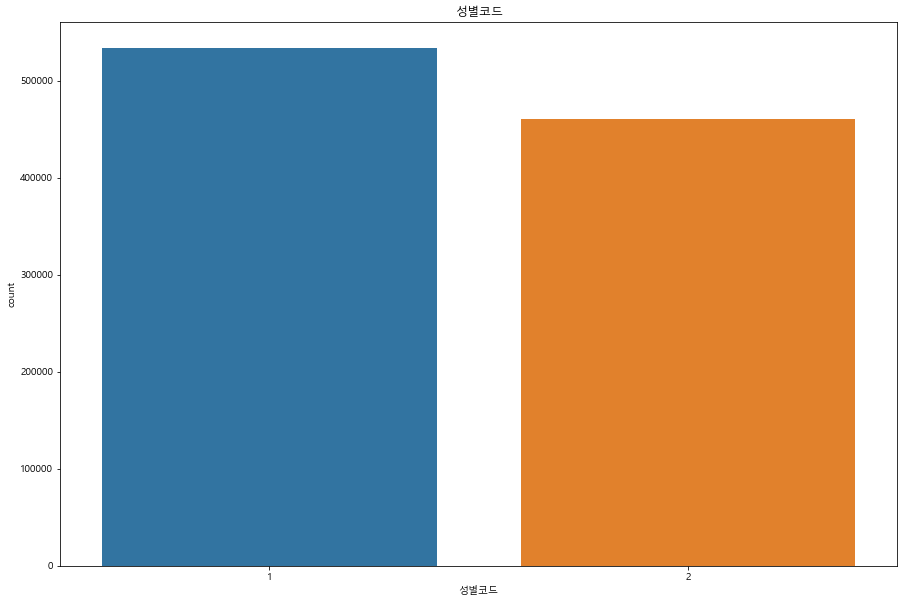

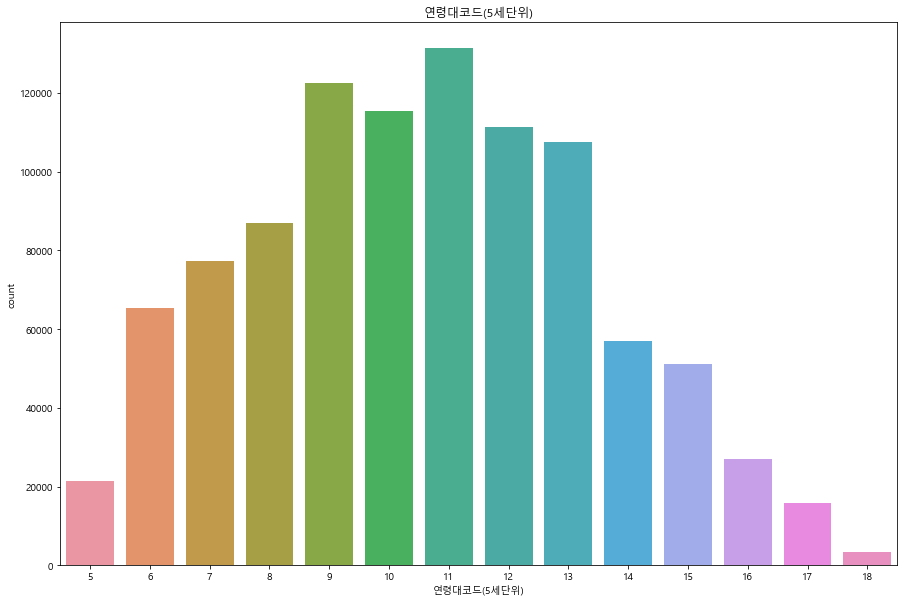

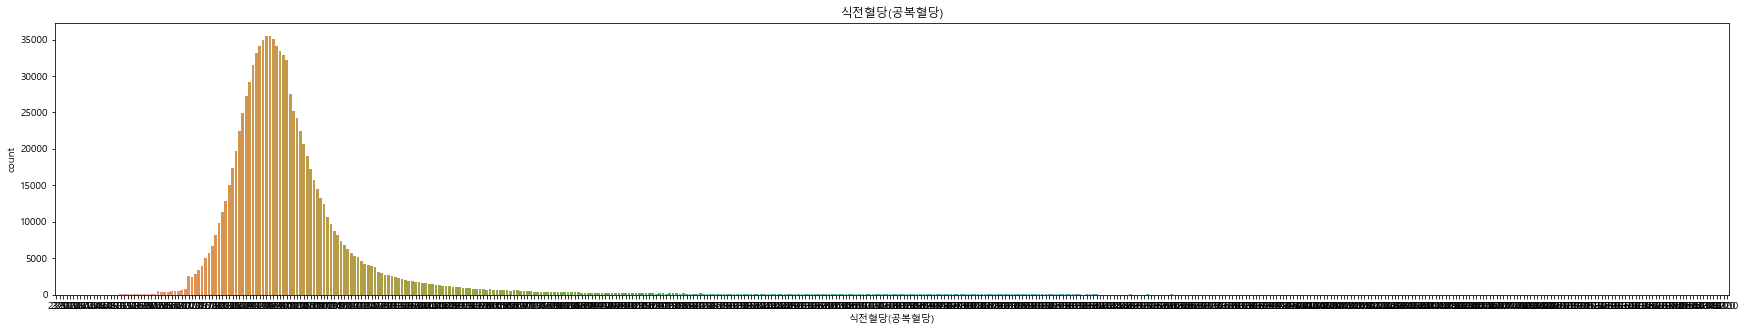

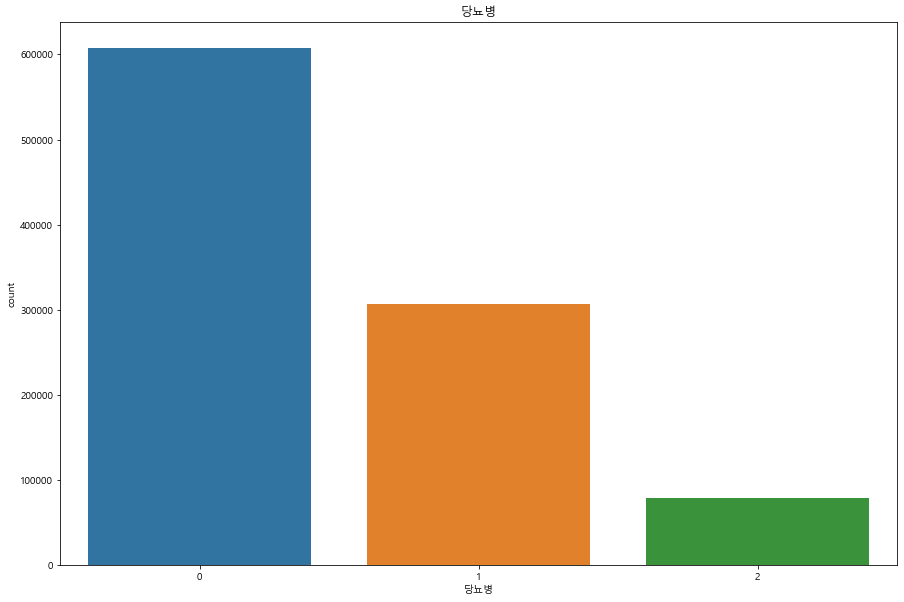

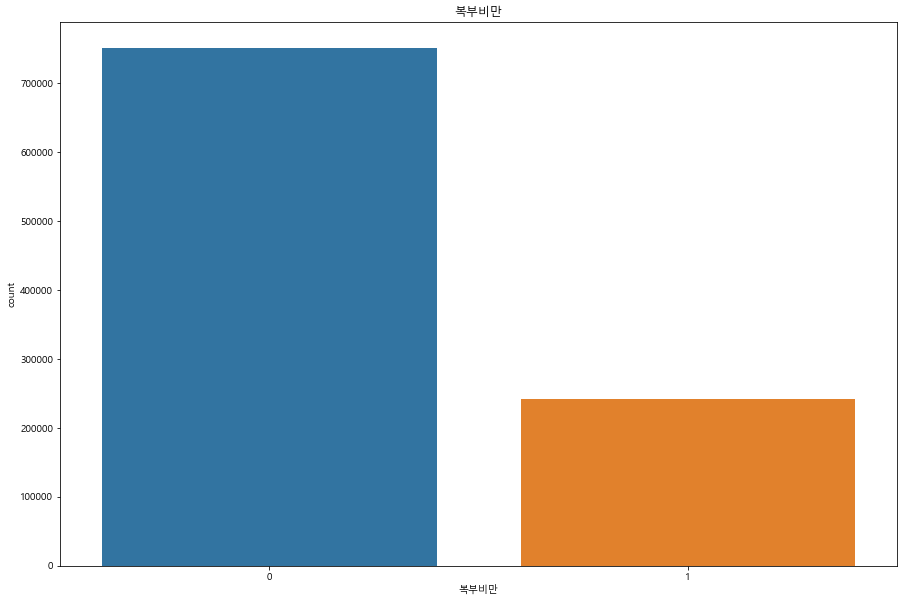

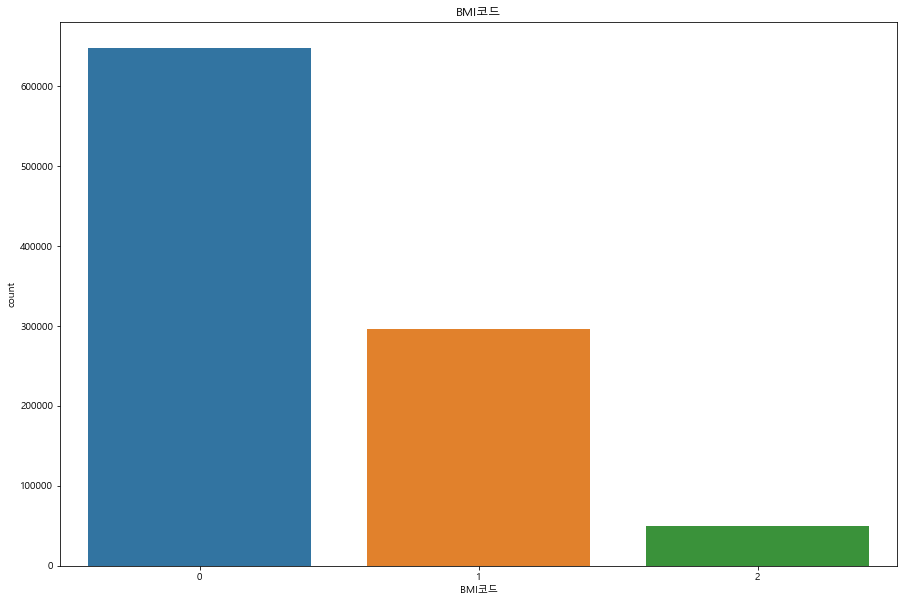

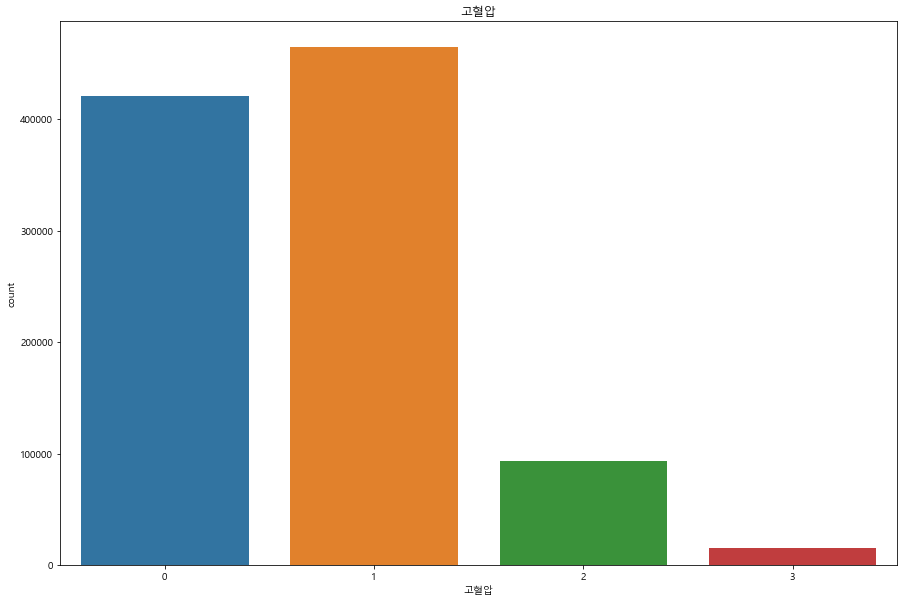

In [20]:
def get_plot(column_name, df):
    if(df[column_name].value_counts().shape[0]) > 100:
        plt.figure(figsize=(30,5))
    sns.countplot(x=column_name, data=df)
    plt.title(column_name)
    plt.show()
    
colums=['성별코드','연령대코드(5세단위)','식전혈당(공복혈당)','당뇨병','복부비만','BMI코드','고혈압']

for c in colums:
    get_plot(c,df)

<h3>엔트로피, 정보증가량</h3>

-범주형 값을 가지는 속성만 그룹으로 나눔 <br/>
-수치형 속성은 분할점 어떻게???

In [21]:
def getEntropy(df, feature) :
    unique = list(df[feature].unique()) 
    entropy = 0
    for i in range(len(unique)):
        p = len(df[df[feature] == unique[i]])/len(df[feature])
        entropy = entropy - p*math.log(p,2)
    return(entropy)

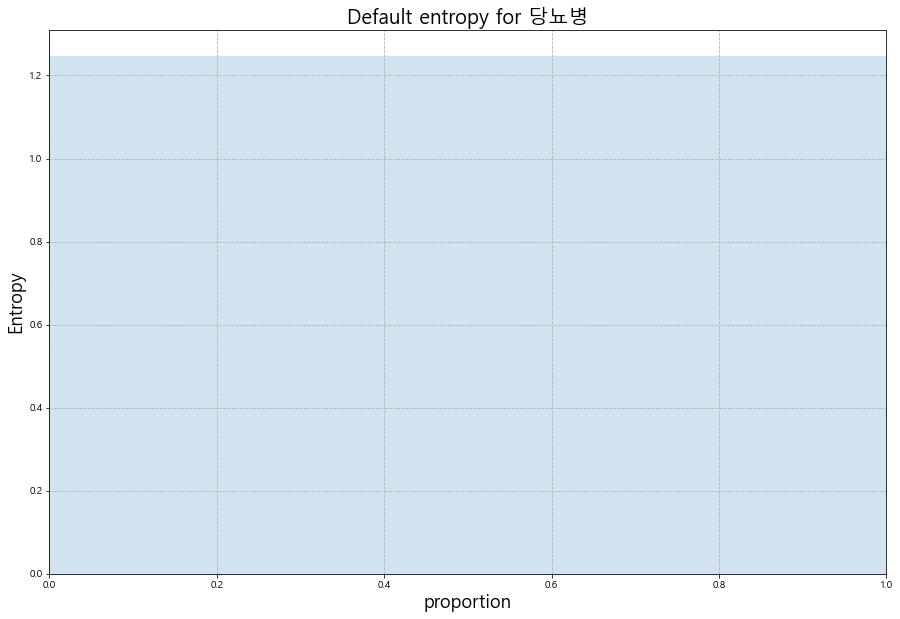

분화전 전체그룹의 엔트로피 =>1.246706494341796
시각화 관점에서 부모 엔트로피 히스토그램의 전체 면적과 자식 그룹들의 엔트로피 히스토그램 면접의 합의 차이가 가장 큰 경우가 정보량이 가장 증가 한 경우


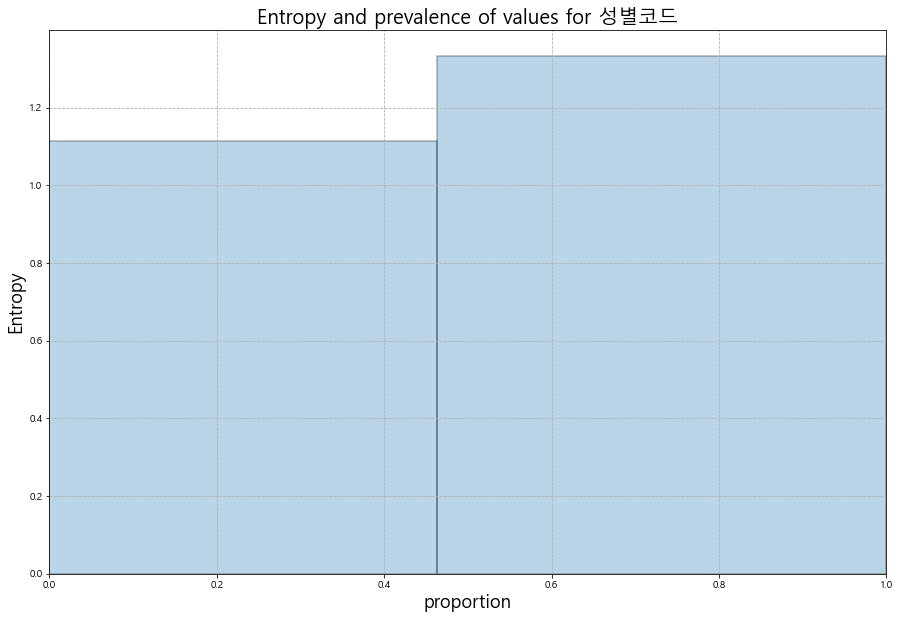

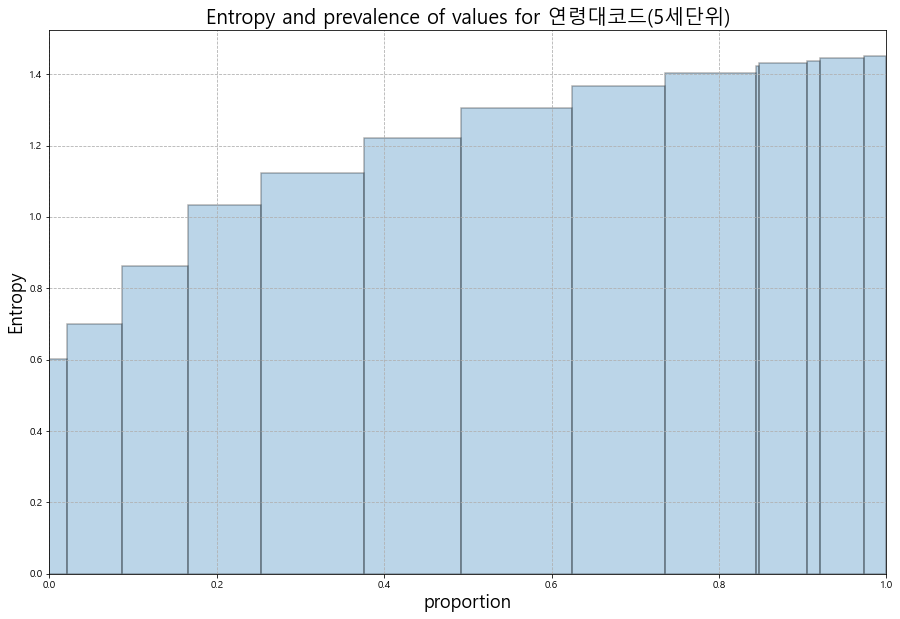

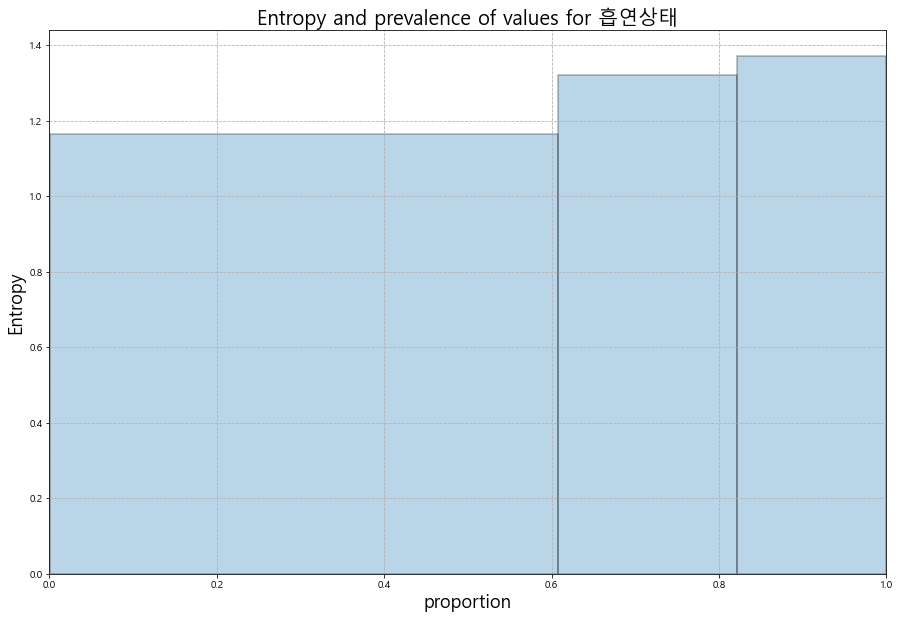

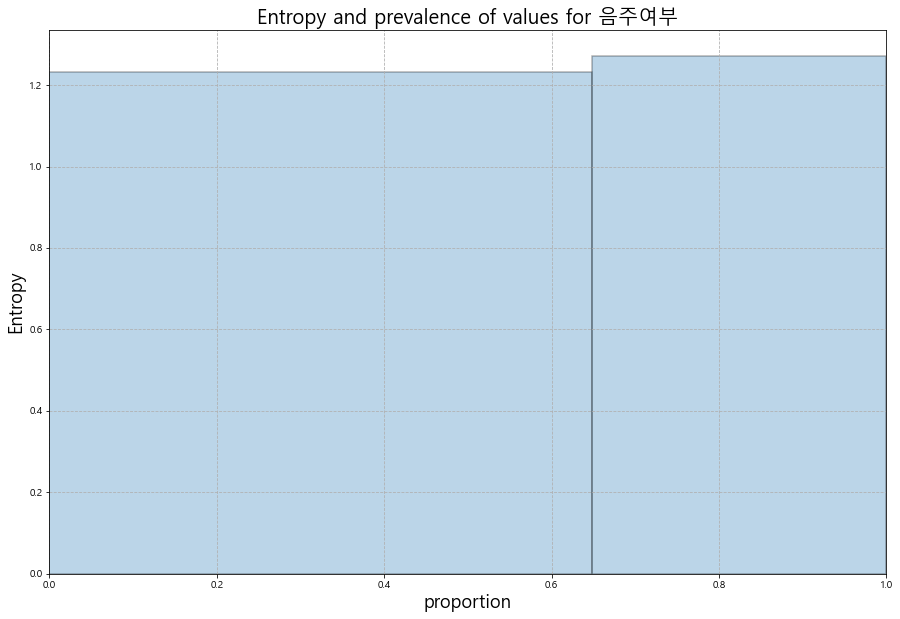

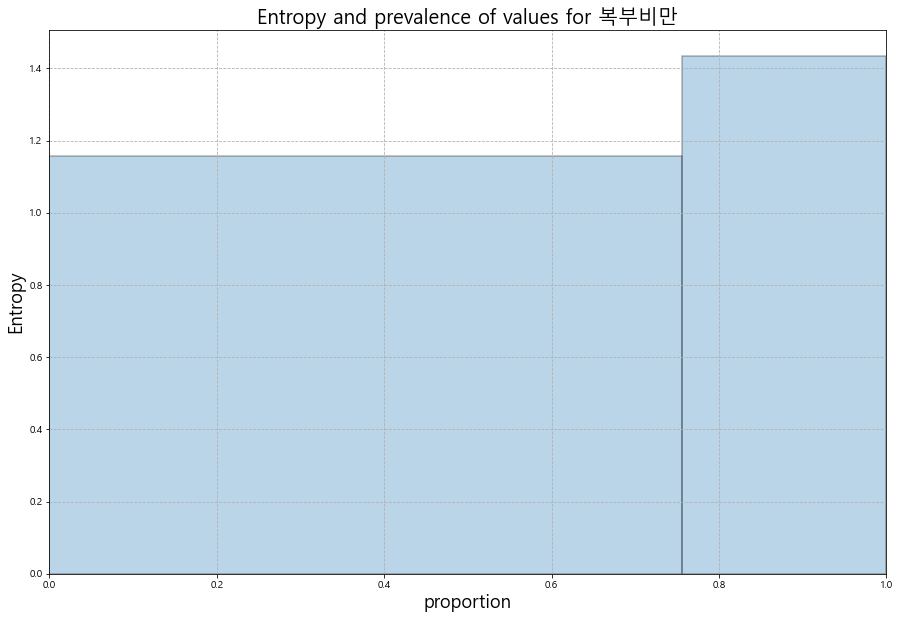

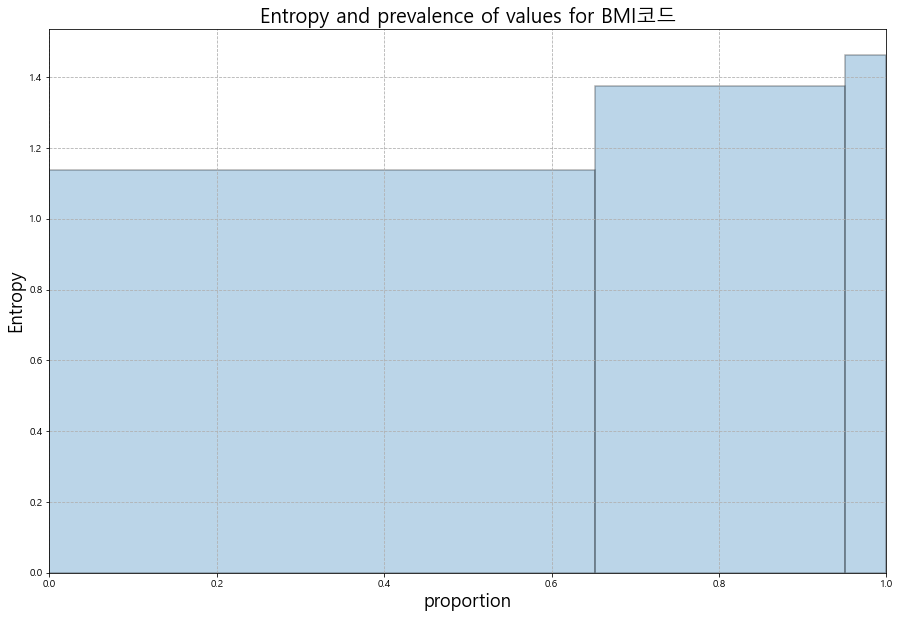

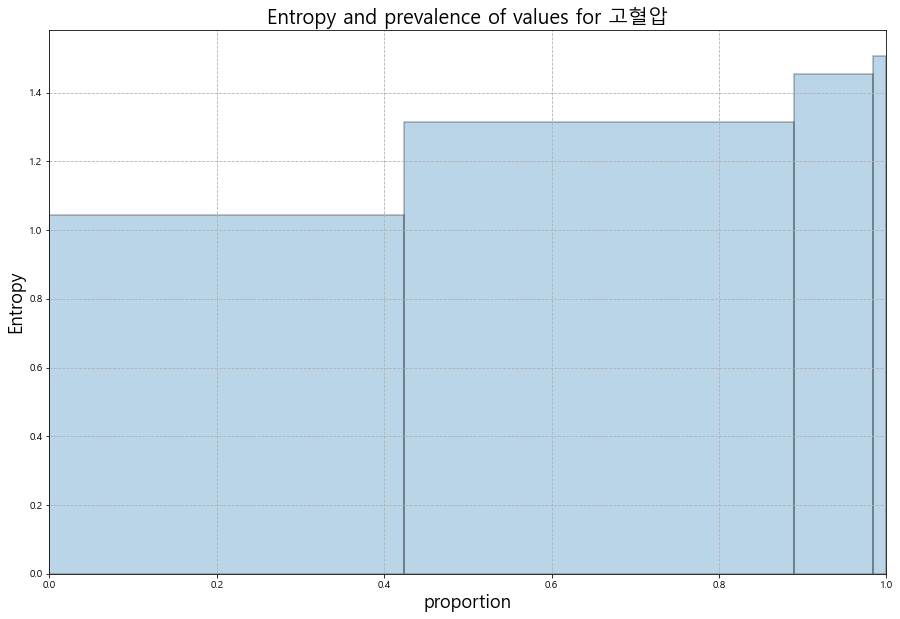

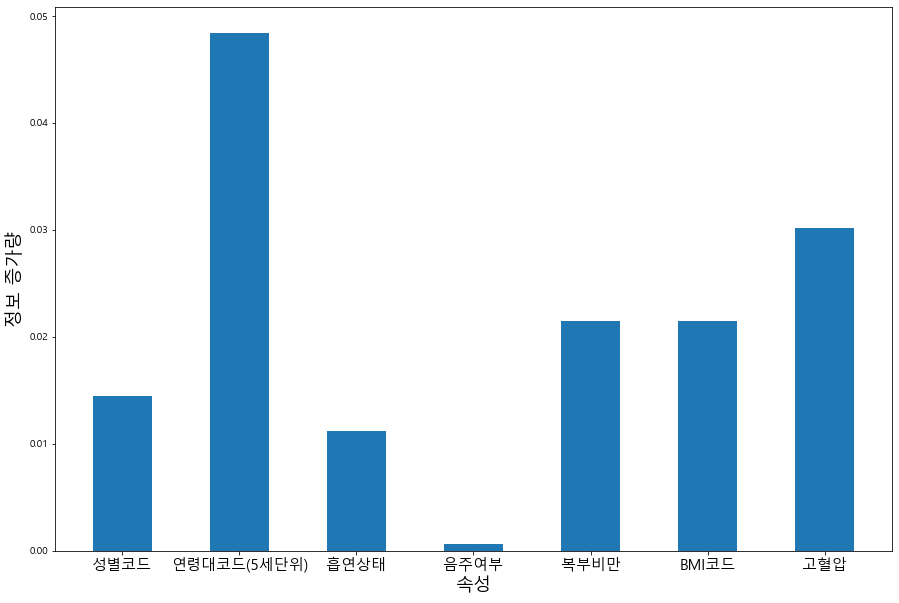

In [117]:
def getGainA(df, g_feature,t_feature): #g_feature속성으로 그룹을 나눴을때 정보증가량
    info_D = getEntropy(df, t_feature) 
    
    
    info_Di = 0
    unique = list(df[g_feature].unique()) 
    index= np.ones(len(unique))
    proportion = np.zeros(len(unique))
    g_entropy = np.zeros(len(unique))
    for i in range(len(unique)):
        new = df.loc[df[g_feature] == unique[i]]
        info_Di += (len(new[g_feature])/len(df[g_feature])) *(getEntropy(new, t_feature))
        g_entropy[i] = getEntropy(new, t_feature)
        proportion[i] = -1 * round(len(new[g_feature])/len(df[g_feature]),3)
        
    gain = info_D - info_Di
    
    s1 = pd.Series(g_entropy, index=proportion)
    s1 = s1.sort_values()
    
    for i in range(1,len(unique)):
        index[len(unique)-i-1] = index[len(unique)-i] + s1.index[len(unique)-i]
        
    plt.bar(index, s1.values, width=s1.index, align="edge" ,alpha=0.3, linewidth=1.5 ,edgecolor ='black')
    plt.xlim([0.0, 1.0]) 
    plt.xlabel('proportion', fontsize=18)
    plt.ylabel('Entropy', fontsize=18)
    plt.title("Entropy and prevalence of values for " + g_feature,size = 20)
    plt.grid(True,linestyle='--')
    plt.show()    
    
    return(gain)



ind= np.ones(1)
prop = np.zeros(1)
ent = np.zeros(1)
ind[0] = 1
prop[0] = -1
ent[0] = getEntropy(df,"당뇨병")
plt.bar(ind, ent, width=prop, align="edge" ,alpha=0.2)
plt.xlim([0.0, 1.0]) 
plt.xlabel('proportion', fontsize=18)
plt.ylabel('Entropy', fontsize=18)
plt.title("Default entropy for 당뇨병",size = 20)
plt.grid(True,linestyle='--')
plt.show()  

print("분화전 전체그룹의 엔트로피 =>" + str(getEntropy(df,"당뇨병"))) ##당뇨병 속성에 대한 전체 엔트로피
print("시각화 관점에서 부모 엔트로피 히스토그램의 전체 면적과 자식 그룹들의 엔트로피 히스토그램 면접의 합의 차이가 가장 큰 경우가 정보량이 가장 증가 한 경우")

label = np.array(["성별코드","연령대코드(5세단위)","흡연상태",
                 "음주여부","복부비만","BMI코드","고혈압"])
index = np.arange(len(label))

gains = np.zeros(len(label))
for i in range(7):
    gains[i] = getGainA(df,label[i],"당뇨병")

plt.bar(index, gains, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('정보 증가량', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()





정보증가량이 높은 연령대코드,고혈압,복부비반,BMI코드를 중요속성으로 뽑아냄